In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as ps
import joblib
import warnings
warnings.filterwarnings('ignore')

In [358]:
dfWater = pd.read_csv('old data/nla_2017_water_chemistry_chla-data.csv')
dfWater = dfWater.filter(['SITE_ID', 'ANALYTE', 'RESULT', 'RESULT_UNITS'])

def checkForNull(df):
    Sum = df.isnull().sum()
    Percentage = (df.isnull().sum()/df.isnull().count())
    return pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

checkForNull(dfWater)


,Sum,Percentage
SITE_ID,0,0.000000
ANALYTE,0,0.000000
RESULT,240,0.010493
RESULT_UNITS,251,0.010974


In [359]:
dfWater = dfWater.dropna()
checkForNull(dfWater)        

,Sum,Percentage
SITE_ID,0,0.0
ANALYTE,0,0.0
RESULT,0,0.0
RESULT_UNITS,0,0.0


In [360]:
for index, row in dfWater.iterrows():
    row['ANALYTE'] += " (" + row['RESULT_UNITS'] + ")"
dfWater.drop(columns=['RESULT_UNITS'], inplace=True)

dfWater.head()

,SITE_ID,ANALYTE,RESULT
0,NLA17_NV-10018,MAGNESIUM (MG/L),109.932
1,NLA17_NV-10018,DOC (MG/L),7.72
2,NLA17_NV-10018,SILICA (MG/L),6.996
3,NLA17_NV-10018,CHLORIDE (MG/L),101.625
4,NLA17_NV-10018,COND (US/CM AT 25 C),2172.4


In [361]:
#only count reruns if duplicates
dfWater.drop_duplicates(subset=['SITE_ID', 'ANALYTE'], keep='last', inplace=True)
dfWater = dfWater.pivot(index='SITE_ID', columns='ANALYTE', values='RESULT')
dfWater.head()


ANALYTE,ALUMINUM (MG/L),AMMONIA_N (MG N/L),ANC (UEQ/L),CALCIUM (MG/L),CHLA (UG/L),CHLORIDE (MG/L),COLOR (APHA PT-CO),COND (US/CM AT 25 C),COND (US/CM),DOC (MG/L),...,NTL (MG N/L),NTL (MG/L),PH (STD. UNITS),POTASSIUM (MG/L),PTL (UG/L),SILICA (MG/L),SODIUM (MG/L),SULFATE (MG/L),TKN (MG/L),TURB (NTU)
SITE_ID,,,,,,,,,,,,,,,,,,,,,
NLA17_AL-10001,NaN,0.014,1343.75,24.568,37.92,5.959,26,311.2,NaN,3.21,...,NaN,0.781,8.65,2.746,44.2825,5.86,17.822,70.192,NaN,2.87
NLA17_AL-10002,NaN,0.01,1245.12,18.743,31.04,5.396,7,160.7,NaN,2.73,...,NaN,0.534,8.25,1.819,54.03875,6.403,4.74,6.995,NaN,5.52
NLA17_AL-10003,NaN,0.026,1008.15,21.255,11.95,5.048,35,147.1,NaN,6.81,...,NaN,0.776,7.9,1.935,100.4125,6.975,4.818,9.101,NaN,25.82
NLA17_AL-10004,NaN,0.009,47.17,1.213,28.24,2.307,15,18.2,NaN,4.54,...,NaN,0.666,6.48,0.142,55.44625,1.046,1.375,0.929,NaN,3.24
NLA17_AL-10005,NaN,0.009,219.39,2.662,32.32,1.895,10,35.3,NaN,5.18,...,NaN,0.813,7.37,1.125,44.61625,7.822,1.756,0.778,NaN,6.18


In [362]:
dfWater.isnull().sum()

ANALYTE
ALUMINUM (MG/L)               1063
AMMONIA_N (MG N/L)              69
ANC (UEQ/L)                      2
CALCIUM (MG/L)                   3
CHLA (UG/L)                      0
CHLORIDE (MG/L)                 17
COLOR (APHA PT-CO)              31
COND (US/CM AT 25 C)            32
COND (US/CM)                  1104
DOC (MG/L)                      11
MAGNESIUM (MG/L)                 2
NITRATE_N (MG N/L)              76
NITRATE_NITRITE_N (MG N/L)    1101
NITRITE_N (MG N/L)              83
NTL (MG N/L)                  1104
NTL (MG/L)                      16
PH (STD. UNITS)                 22
POTASSIUM (MG/L)                11
PTL (UG/L)                      11
SILICA (MG/L)                   16
SODIUM (MG/L)                    1
SULFATE (MG/L)                  23
TKN (MG/L)                    1099
TURB (NTU)                      31
dtype: int64

In [363]:
dfWater.dropna(thresh = 1000, axis = 1, inplace=True)
dfWater.isnull().sum()

ANALYTE
AMMONIA_N (MG N/L)      69
ANC (UEQ/L)              2
CALCIUM (MG/L)           3
CHLA (UG/L)              0
CHLORIDE (MG/L)         17
COLOR (APHA PT-CO)      31
COND (US/CM AT 25 C)    32
DOC (MG/L)              11
MAGNESIUM (MG/L)         2
NITRATE_N (MG N/L)      76
NITRITE_N (MG N/L)      83
NTL (MG/L)              16
PH (STD. UNITS)         22
POTASSIUM (MG/L)        11
PTL (UG/L)              11
SILICA (MG/L)           16
SODIUM (MG/L)            1
SULFATE (MG/L)          23
TURB (NTU)              31
dtype: int64

In [364]:
dfWater = dfWater.apply(pd.to_numeric, errors="coerce")
dfWater = dfWater.fillna(0)
dfWater.isnull().sum()

,SITE_ID,AMMONIA_N (MG N/L),ANC (UEQ/L),CALCIUM (MG/L),CHLA (UG/L),CHLORIDE (MG/L),COLOR (APHA PT-CO),COND (US/CM AT 25 C),DOC (MG/L),MAGNESIUM (MG/L),...,NITRITE_N (MG N/L),NTL (MG/L),PH (STD. UNITS),POTASSIUM (MG/L),PTL (UG/L),SILICA (MG/L),SODIUM (MG/L),SULFATE (MG/L),TURB (NTU),DENSITY
0,NLA17_AL-10001,0.014,1343.75,24.568,37.92,5.959,26,311.2,3.21,13.188,...,0.008,0.781,8.65,2.746,44.2825,5.86,17.822,70.192,2.87,990.846164
1,NLA17_AL-10002,0.01,1245.12,18.743,31.04,5.396,7.0,160.7,2.73,4.696,...,0.0,0.534,8.25,1.819,54.03875,6.403,4.74,6.995,5.52,137.630829
2,NLA17_AL-10003,0.026,1008.15,21.255,11.95,5.048,35.0,147.1,6.81,2.031,...,0.017,0.776,7.9,1.935,100.4125,6.975,4.818,9.101,25.82,324.313250
3,NLA17_AL-10004,0.009,47.17,1.213,28.24,2.307,15.0,18.2,4.54,0.478,...,0.0,0.666,6.48,0.142,55.44625,1.046,1.375,0.929,3.24,2047.892377
4,NLA17_AL-10005,0.009,219.39,2.662,32.32,1.895,10.0,35.3,5.18,1.234,...,0.001,0.813,7.37,1.125,44.61625,7.822,1.756,0.778,6.18,821.685140


In [365]:
dfZooplankton = pd.read_csv('old data/nla-2017-zooplankton-count-data.csv')
#ignore rare taxa/species as they are categorized differently
dfZooplankton = dfZooplankton.drop(index = dfZooplankton[dfZooplankton['LARGE_RARE_TAXA'] == 'Y'].index)

dfZooplankton = dfZooplankton.filter(['SITE_ID', 'DENSITY'])
dfZooplankton.head()

,SITE_ID,DENSITY
0,NLA17_NV-10018,6.386575
1,NLA17_NV-10018,54.117819
2,NLA17_NV-10018,9.411795
3,NLA17_NV-10018,66.554834
4,NLA17_NV-10018,1.008407


In [366]:
checkForNull(dfZooplankton)

,Sum,Percentage
SITE_ID,0,0.0
DENSITY,0,0.0


In [367]:
dfZooplankton = dfZooplankton.groupby(["SITE_ID"], as_index=False).agg({'DENSITY' : 'sum'})
#dfZooplankton.rename(columns={'DENSITY':'DENSITY (ORGANISMS/L)'},inplace=True)
dfZooplankton.head()

,SITE_ID,DENSITY
0,NLA17_AL-10001,990.846164
1,NLA17_AL-10002,137.630829
2,NLA17_AL-10003,324.313250
3,NLA17_AL-10004,2047.892377
4,NLA17_AL-10005,821.685140


In [418]:
df = pd.merge(dfWater, dfZooplankton, on=["SITE_ID"])
df.head()

,SITE_ID,AMMONIA_N (MG N/L),ANC (UEQ/L),CALCIUM (MG/L),CHLA (UG/L),CHLORIDE (MG/L),COLOR (APHA PT-CO),COND (US/CM AT 25 C),DOC (MG/L),MAGNESIUM (MG/L),...,NITRITE_N (MG N/L),NTL (MG/L),PH (STD. UNITS),POTASSIUM (MG/L),PTL (UG/L),SILICA (MG/L),SODIUM (MG/L),SULFATE (MG/L),TURB (NTU),DENSITY
0,NLA17_AL-10001,0.014,1343.75,24.568,37.92,5.959,26.0,311.2,3.21,13.188,...,0.008,0.781,8.65,2.746,44.28250,5.860,17.822,70.192,2.87,990.846164
1,NLA17_AL-10002,0.010,1245.12,18.743,31.04,5.396,7.0,160.7,2.73,4.696,...,0.000,0.534,8.25,1.819,54.03875,6.403,4.740,6.995,5.52,137.630829
2,NLA17_AL-10003,0.026,1008.15,21.255,11.95,5.048,35.0,147.1,6.81,2.031,...,0.017,0.776,7.90,1.935,100.41250,6.975,4.818,9.101,25.82,324.313250
3,NLA17_AL-10004,0.009,47.17,1.213,28.24,2.307,15.0,18.2,4.54,0.478,...,0.000,0.666,6.48,0.142,55.44625,1.046,1.375,0.929,3.24,2047.892377
4,NLA17_AL-10005,0.009,219.39,2.662,32.32,1.895,10.0,35.3,5.18,1.234,...,0.001,0.813,7.37,1.125,44.61625,7.822,1.756,0.778,6.18,821.685140


In [419]:
df.drop(columns=["SITE_ID"], inplace=True)
print(f'Data Frame Shape (rows, columns): {df.shape}')

Data Frame Shape (rows, columns): (1113, 20)


In [420]:
df.isnull().sum()

AMMONIA_N (MG N/L)      0
ANC (UEQ/L)             0
CALCIUM (MG/L)          0
CHLA (UG/L)             0
CHLORIDE (MG/L)         0
COLOR (APHA PT-CO)      0
COND (US/CM AT 25 C)    0
DOC (MG/L)              0
MAGNESIUM (MG/L)        0
NITRATE_N (MG N/L)      0
NITRITE_N (MG N/L)      0
NTL (MG/L)              0
PH (STD. UNITS)         0
POTASSIUM (MG/L)        0
PTL (UG/L)              0
SILICA (MG/L)           0
SODIUM (MG/L)           0
SULFATE (MG/L)          0
TURB (NTU)              0
DENSITY                 0
dtype: int64

In [421]:
df.head()

,AMMONIA_N (MG N/L),ANC (UEQ/L),CALCIUM (MG/L),CHLA (UG/L),CHLORIDE (MG/L),COLOR (APHA PT-CO),COND (US/CM AT 25 C),DOC (MG/L),MAGNESIUM (MG/L),NITRATE_N (MG N/L),NITRITE_N (MG N/L),NTL (MG/L),PH (STD. UNITS),POTASSIUM (MG/L),PTL (UG/L),SILICA (MG/L),SODIUM (MG/L),SULFATE (MG/L),TURB (NTU),DENSITY
0,0.014,1343.75,24.568,37.92,5.959,26.0,311.2,3.21,13.188,0.1576,0.008,0.781,8.65,2.746,44.28250,5.860,17.822,70.192,2.87,990.846164
1,0.010,1245.12,18.743,31.04,5.396,7.0,160.7,2.73,4.696,0.0000,0.000,0.534,8.25,1.819,54.03875,6.403,4.740,6.995,5.52,137.630829
2,0.026,1008.15,21.255,11.95,5.048,35.0,147.1,6.81,2.031,0.1692,0.017,0.776,7.90,1.935,100.41250,6.975,4.818,9.101,25.82,324.313250
3,0.009,47.17,1.213,28.24,2.307,15.0,18.2,4.54,0.478,0.0000,0.000,0.666,6.48,0.142,55.44625,1.046,1.375,0.929,3.24,2047.892377
4,0.009,219.39,2.662,32.32,1.895,10.0,35.3,5.18,1.234,0.0031,0.001,0.813,7.37,1.125,44.61625,7.822,1.756,0.778,6.18,821.685140


Text(0, 0.5, 'correlation')

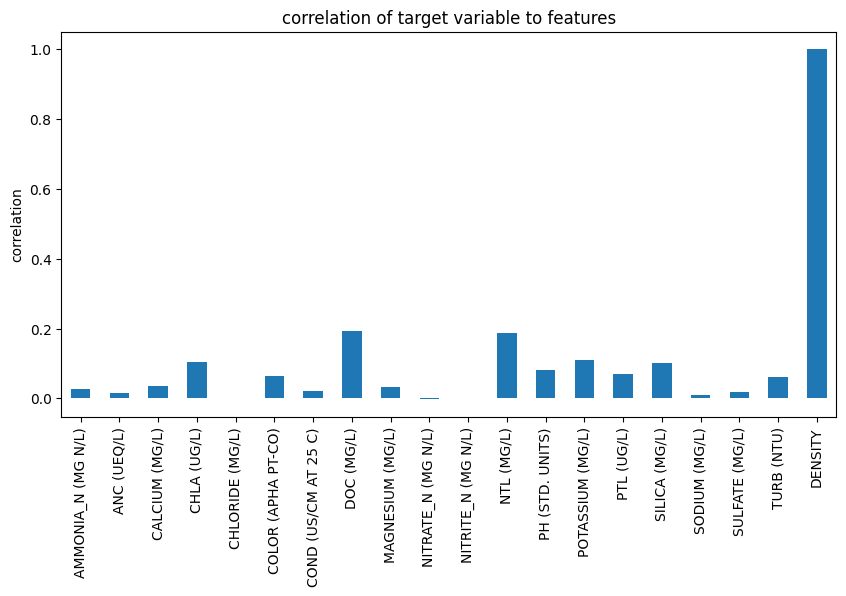

In [422]:
#sns.pairplot(df, hue="DENSITY")

plt.figure(figsize=(10,5))
ax = df.corr()['DENSITY'].plot(kind='bar',title='correlation of target variable to features')
ax.set_ylabel('correlation')

Text(0.5, 1.0, 'Correlation Matrix')

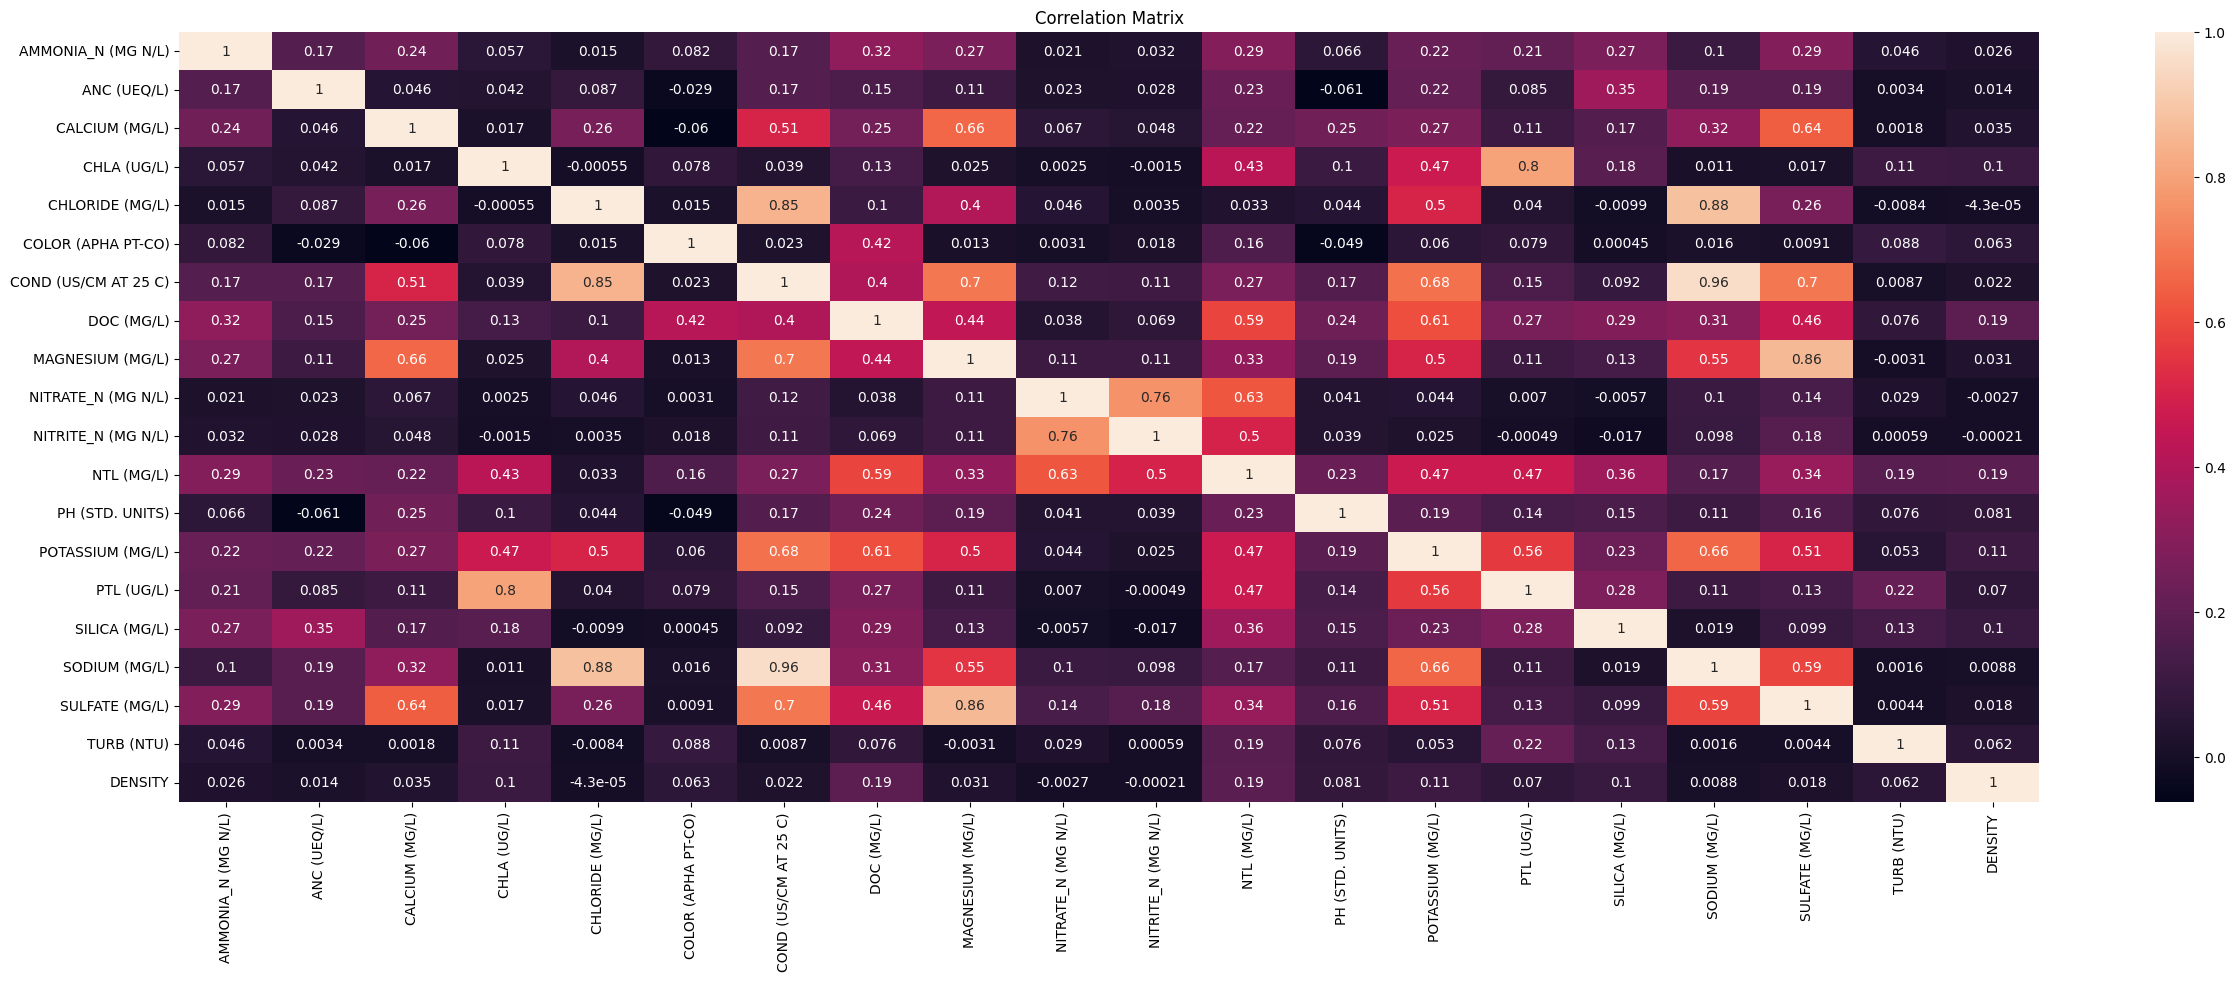

In [423]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(),annot=True).set_title("Correlation Matrix")

In [424]:
df.describe()

,AMMONIA_N (MG N/L),ANC (UEQ/L),CALCIUM (MG/L),CHLA (UG/L),CHLORIDE (MG/L),COLOR (APHA PT-CO),COND (US/CM AT 25 C),DOC (MG/L),MAGNESIUM (MG/L),NITRATE_N (MG N/L),NITRITE_N (MG N/L),NTL (MG/L),PH (STD. UNITS),POTASSIUM (MG/L),PTL (UG/L),SILICA (MG/L),SODIUM (MG/L),SULFATE (MG/L),TURB (NTU),DENSITY
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000
mean,0.038326,2611.046642,27.786327,28.731187,53.682333,25.337826,583.217430,8.108643,26.617226,0.096848,0.001992,1.110102,7.806424,7.993978,108.387867,7.891377,73.808091,144.860933,12.041612,1512.226100
std,0.132334,12904.926609,43.480505,114.537349,482.517972,30.552128,1846.855009,8.985805,75.314812,0.991706,0.027178,1.746426,1.366944,26.558572,400.358654,9.060315,410.828283,539.152111,48.576506,6232.853975
min,0.000000,-1470.600000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.719380
25%,0.008000,335.210000,4.300000,3.100000,1.446000,9.000000,52.300000,3.600000,1.463000,0.000000,0.000000,0.358000,7.380000,0.742000,14.790000,1.932000,2.279000,1.283000,1.190000,216.285202
50%,0.014000,1334.150000,18.387000,8.550000,5.722000,18.000000,189.200000,5.870000,5.030000,0.000000,0.000000,0.648000,8.120000,2.007000,32.400000,5.171000,6.141000,4.658000,2.930000,501.460337
75%,0.025000,2738.960000,34.700000,25.710000,19.046000,32.000000,415.200000,9.100000,18.207000,0.002400,0.000000,1.259000,8.500000,4.972000,90.000000,10.148000,22.448000,23.333000,7.450000,1195.212973
max,3.273000,409631.000000,564.376000,3299.180000,12271.884000,350.000000,34206.100000,163.410000,1056.768000,31.306900,0.715000,36.375000,10.010000,441.486000,11238.800000,98.800000,8198.132000,7092.085000,720.000000,130264.730613


Text(0.5, 1.0, 'Water Density')

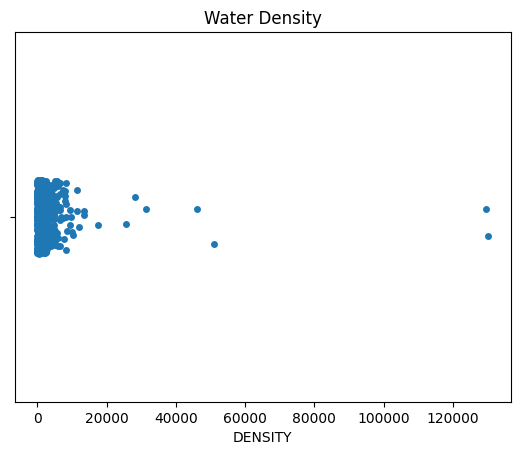

In [425]:
sns.stripplot(data=df, x="DENSITY").set_title("Water Density")

In [433]:
df["DENSITY"] = np.log(df["DENSITY"])
df=df.rename(columns={"DENSITY" : "NORMALIZED DENSITY"})
df.head()

KeyError: 'DENSITY'

,AMMONIA_N (MG N/L),ANC (UEQ/L),CALCIUM (MG/L),CHLA (UG/L),CHLORIDE (MG/L),COLOR (APHA PT-CO),COND (US/CM AT 25 C),DOC (MG/L),MAGNESIUM (MG/L),NITRATE_N (MG N/L),NITRITE_N (MG N/L),NTL (MG/L),PH (STD. UNITS),POTASSIUM (MG/L),PTL (UG/L),SILICA (MG/L),SODIUM (MG/L),SULFATE (MG/L),TURB (NTU),NORMALIZED DENSITY
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000
mean,0.038326,2611.046642,27.786327,28.731187,53.682333,25.337826,583.217430,8.108643,26.617226,0.096848,0.001992,1.110102,7.806424,7.993978,108.387867,7.891377,73.808091,144.860933,12.041612,6.185891
std,0.132334,12904.926609,43.480505,114.537349,482.517972,30.552128,1846.855009,8.985805,75.314812,0.991706,0.027178,1.746426,1.366944,26.558572,400.358654,9.060315,410.828283,539.152111,48.576506,1.476632
min,0.000000,-1470.600000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.329365
25%,0.008000,335.210000,4.300000,3.100000,1.446000,9.000000,52.300000,3.600000,1.463000,0.000000,0.000000,0.358000,7.380000,0.742000,14.790000,1.932000,2.279000,1.283000,1.190000,5.376598
50%,0.014000,1334.150000,18.387000,8.550000,5.722000,18.000000,189.200000,5.870000,5.030000,0.000000,0.000000,0.648000,8.120000,2.007000,32.400000,5.171000,6.141000,4.658000,2.930000,6.217525
75%,0.025000,2738.960000,34.700000,25.710000,19.046000,32.000000,415.200000,9.100000,18.207000,0.002400,0.000000,1.259000,8.500000,4.972000,90.000000,10.148000,22.448000,23.333000,7.450000,7.086080
max,3.273000,409631.000000,564.376000,3299.180000,12271.884000,350.000000,34206.100000,163.410000,1056.768000,31.306900,0.715000,36.375000,10.010000,441.486000,11238.800000,98.800000,8198.132000,7092.085000,720.000000,11.777324


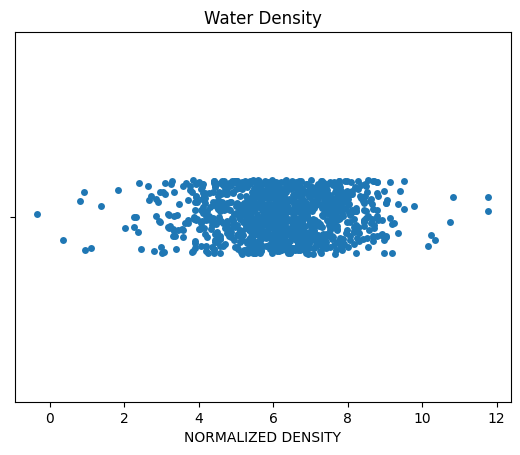

In [434]:
sns.stripplot(data=df, x="NORMALIZED DENSITY").set_title("Water Density")
df.describe()

In [452]:
bins = [-100,3,5,7,9,100] #log normalization doesn't necessarily normalize between 0-12 so must take into account <0 and >12
labels = [0, 1, 2, 3, 4]
#0- Barren
#1- Little
#2- Moderate
#3- High
#4- Dense

dfCategorized = df.copy()
dfCategorized["DENSITY RANGE"]= pd.cut(x=dfCategorized["NORMALIZED DENSITY"], bins=bins, labels = labels)
dfCategorized.drop(columns=["NORMALIZED DENSITY"], inplace=True)
dfCategorized.head()

,AMMONIA_N (MG N/L),ANC (UEQ/L),CALCIUM (MG/L),CHLA (UG/L),CHLORIDE (MG/L),COLOR (APHA PT-CO),COND (US/CM AT 25 C),DOC (MG/L),MAGNESIUM (MG/L),NITRATE_N (MG N/L),NITRITE_N (MG N/L),NTL (MG/L),PH (STD. UNITS),POTASSIUM (MG/L),PTL (UG/L),SILICA (MG/L),SODIUM (MG/L),SULFATE (MG/L),TURB (NTU),DENSITY RANGE
0,0.014,1343.75,24.568,37.92,5.959,26.0,311.2,3.21,13.188,0.1576,0.008,0.781,8.65,2.746,44.28250,5.860,17.822,70.192,2.87,2
1,0.010,1245.12,18.743,31.04,5.396,7.0,160.7,2.73,4.696,0.0000,0.000,0.534,8.25,1.819,54.03875,6.403,4.740,6.995,5.52,1
2,0.026,1008.15,21.255,11.95,5.048,35.0,147.1,6.81,2.031,0.1692,0.017,0.776,7.90,1.935,100.41250,6.975,4.818,9.101,25.82,2
3,0.009,47.17,1.213,28.24,2.307,15.0,18.2,4.54,0.478,0.0000,0.000,0.666,6.48,0.142,55.44625,1.046,1.375,0.929,3.24,3
4,0.009,219.39,2.662,32.32,1.895,10.0,35.3,5.18,1.234,0.0031,0.001,0.813,7.37,1.125,44.61625,7.822,1.756,0.778,6.18,2


Text(0.5, 1.0, 'Density Range Counts')

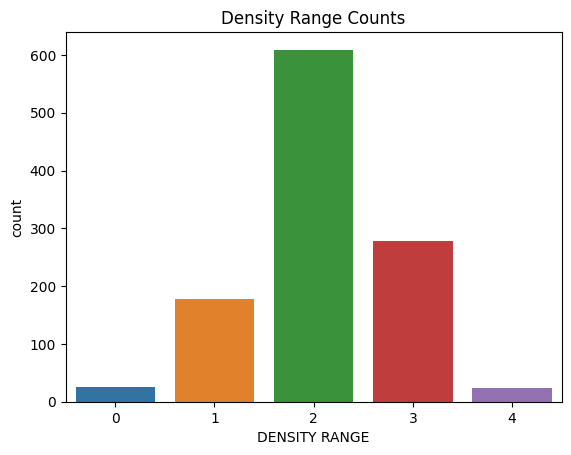

In [446]:
sns.countplot(data=dfCategorized, x="DENSITY RANGE").set_title("Density Range Counts")

In [427]:
import tpot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [453]:
X = dfCategorized.drop(columns=['DENSITY RANGE'],axis=1) 
y = dfCategorized["DENSITY RANGE"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [454]:
lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [455]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('Accuracy in Train set   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  set   : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy in Train set   : 0.52
Accuracy in Test  set   : 0.59


In [456]:
bins = [-100,5,7,100]
labels = [0, 1, 2]
#0- Low
#1- Medium
#2- High

dfCategorized2 = df.copy()
dfCategorized2["DENSITY RANGE"]= pd.cut(x=dfCategorized2["NORMALIZED DENSITY"], bins=bins, labels = labels)
dfCategorized2.drop(columns=["NORMALIZED DENSITY"], inplace=True)

X = dfCategorized2.drop(columns=['DENSITY RANGE'],axis=1) 
y = dfCategorized2["DENSITY RANGE"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('Accuracy in Train set   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  set   : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy in Train set   : 0.53
Accuracy in Test  set   : 0.60


In [457]:
AutoML = tpot.TPOTClassifier(
                            generations=5,
                            population_size=100,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=None,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )

In [458]:
AutoML.fit(X_train,y_train)

                                                                              
Generation 1 - Current best internal CV score: 0.6235955056179775
                                                                                
Generation 2 - Current best internal CV score: 0.6235955056179775
                                                                              
Generation 3 - Current best internal CV score: 0.6235955056179775
                                                                              
Generation 4 - Current best internal CV score: 0.6235955056179775
                                                                              
Generation 5 - Current best internal CV score: 0.6258426966292135
                                                                              
Best pipeline: DecisionTreeClassifier(GaussianNB(input_matrix), criterion=entropy, max_depth=3, min_samples_leaf=15, min_samples_split=10)


TPOTClassifier(generations=5, verbosity=2)

In [ ]:
AutoML = tpot.TPOTClassifier(
                            generations=5,
                            population_size=100,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=None,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )

In [ ]:
AutoML.fit(X,y)
#save model 
with open('model-v1.joblib', 'wb') as f:
    joblib.dump(lr,f)

Generation 1 - Current best internal CV score: 0.9318147687570321
Generation 2 - Current best internal CV score: 0.9318147687570321
Generation 3 - Current best internal CV score: 0.9318147687570321
Generation 4 - Current best internal CV score: 0.9318147687570321
Generation 5 - Current best internal CV score: 0.9318147687570321

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=20, p=2, weights=uniform)


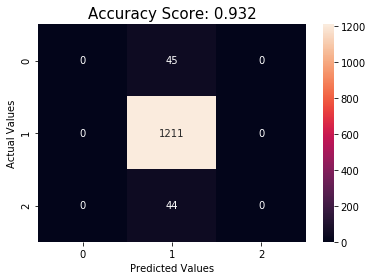

In [ ]:
from sklearn.metrics import confusion_matrix as cm

predictions = AutoML.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
AutoML.export('pipeline.py')